In [26]:
# Import Dependenices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport

%matplotlib inline
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
#from pandas_profiling import ProfileReport
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [27]:
# Load Dataset
df =pd.read_csv("E:\\Research Related Work\\Fianal CSV\\combine7k100k40.csv")
df.shape

(107211, 42)

In [28]:
df

,Unnamed: 0,Energy,Corr,Diss_sim,Homogen,Contrast,Entropy,Haralick1,Haralick2,Haralick3,...,hu1,hu2,hu3,hu4,hu6,class,coarseness,contrast,directionality,roughness
0,0,0.178920,0.786274,6.599315,0.409190,266.221593,4.930889,0.133171,157.548557,0.877184,...,2.197091,6.499417,7.954630,8.719217,12.059353,0,7.232243,11.838639,524.241477,19.070882
1,1,0.389069,0.887791,4.647942,0.638527,195.693025,4.117529,0.037307,182.556783,0.616758,...,1.964328,5.830540,8.081376,8.388579,11.313066,0,6.322784,5.852207,476.605065,12.174991
2,2,0.393111,0.619520,0.803672,0.716620,3.756186,2.137906,0.042651,280.438899,0.752334,...,2.022809,6.412916,8.012113,8.285929,-12.031307,0,7.384526,10.495720,1164.156497,17.880247
3,3,0.192022,0.799489,6.047906,0.444753,257.966268,4.527923,0.084406,181.747993,0.736726,...,2.000932,6.155571,7.979497,7.549322,10.661617,0,6.037169,7.026680,207.652122,13.063849
4,4,0.276384,0.823056,3.558016,0.568808,146.219971,3.419359,0.068655,147.920468,0.751789,...,1.992772,6.717633,7.917753,8.553030,-12.171937,0,6.604911,5.956984,622.106991,12.561894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107206,7174,0.009699,0.739877,23.487108,0.063606,1253.438181,7.580289,0.000635,402.469621,0.946864,...,2.663447,7.843077,10.172093,12.032694,-16.499769,8,6.566725,50.651852,279.842610,57.218577
107207,7175,0.024164,0.731407,26.684697,0.110827,1958.241111,7.466144,0.000618,808.134745,0.882292,...,2.886396,9.669045,11.245110,11.807647,16.689479,8,7.222716,37.814312,428.677320,45.037028
107208,7176,0.009427,0.636379,27.309717,0.056254,1665.195408,7.567869,0.000545,2553.152857,0.680206,...,2.693609,7.636186,9.654586,10.030314,14.088027,8,7.012915,49.211151,294.984140,56.224066
107209,7177,0.012891,0.898710,13.378884,0.098573,465.734585,7.500082,0.000086,1232.786444,0.744025,...,2.841735,9.009690,12.077912,11.829759,-16.613485,8,6.790936,36.945887,289.522066,43.736823


In [29]:
df=df.drop(['Unnamed: 0'],axis=1)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107211 entries, 0 to 107210
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Energy              107211 non-null  float64
 1   Corr                107211 non-null  float64
 2   Diss_sim            107211 non-null  float64
 3   Homogen             107211 non-null  float64
 4   Contrast            107211 non-null  float64
 5   Entropy             107211 non-null  float64
 6   Haralick1           107211 non-null  float64
 7   Haralick2           107211 non-null  float64
 8   Haralick3           107211 non-null  float64
 9   Haralick4           107211 non-null  float64
 10  Haralick5           107211 non-null  float64
 11  Haralick6           107211 non-null  float64
 12  Haralick7           107211 non-null  float64
 13  Haralick8           107211 non-null  float64
 14  Haralick9           107211 non-null  float64
 15  Haralick10          107211 non-nul

In [31]:
df.isnull().sum().sort_values(ascending=False).head(100)

gabor_entropy         1763
directionality         169
lbp_entropy              3
EquivDiameter            1
Circularity              1
Shannon_Entropy          1
Glcm_entropy             1
Skewness                 1
kurtosis                 1
lbp_energy               1
gabor_energy             1
Standard Deviation       1
Mean                     1
hu2                      0
hu3                      0
hu4                      0
hu6                      0
class                    0
coarseness               0
contrast                 0
hu1                      0
Energy                   0
Corr                     0
Haralick4                0
Diss_sim                 0
Homogen                  0
Contrast                 0
Entropy                  0
Haralick1                0
Haralick2                0
Haralick3                0
Haralick5                0
Haralick13               0
Haralick6                0
Haralick7                0
Haralick8                0
Haralick9                0
H

In [32]:
df=df.fillna(method='ffill')

In [33]:
y= df['class']
X= df.drop('class', axis=1)


In [34]:
#y = np.array(y, dtype=np.int32)

#X = np.array(X, dtype=np.int32)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20 , random_state=42)


In [36]:
#X_train = np.array(X_train, dtype=np.int32)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#train = scaler.fit_transform(X)


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Univariate Feature Selection

In [49]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2, k=40)
select = bestfeatures.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (85768, 40)
X_train_selected.shape: (85768, 40)


In [50]:
mask = select.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

([], [])

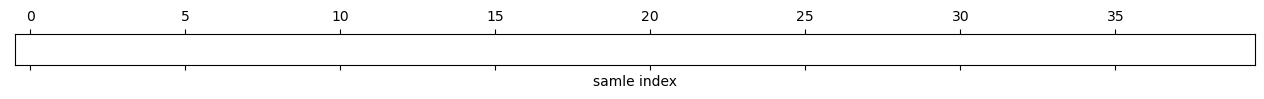

In [51]:
import matplotlib.pyplot as plt
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("samle index")
plt.yticks(())

In [16]:
from sklearn.ensemble import RandomForestClassifier
X_test_selected = select.transform(X_test)

model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit (X_train,y_train)
print("Score with all features: {:.3f}".format(model.score(X_test,y_test)))

model.fit (X_train_selected,y_train)
print("Score with selected features: {:.3f}".format(model.score(X_test_selected,y_test)))

Score with all features: 0.950
Score with selected features: 0.950


In [55]:
name_col=pd.DataFrame(X.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [53]:
name_col

,0
0,Energy
1,Corr
2,Diss_sim
3,Homogen
4,Contrast
5,Entropy
6,Haralick1
7,Haralick2
8,Haralick3
9,Haralick4


In [57]:
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(40).plot(kind='barh')
plt.show()

NotFittedError: need to call fit or load_model beforehand

In [18]:
from xgboost import XGBClassifier
X_test_selected = select.transform(X_test)

model = XGBClassifier(n_estimators=100,random_state=100)
model.fit (X_train,y_train)
print("Score with all features: {:.3f}".format(model.score(X_test,y_test)))

model.fit (X_train_selected,y_train)
print("Score with selected features: {:.3f}".format(model.score(X_test_selected,y_test)))

Score with all features: 0.976
Score with selected features: 0.976


# Random Forest Feature_Importance

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.feature_importances_

array([0.0159404 , 0.02148172, 0.03147635, 0.02652292, 0.02815256,
       0.03427707, 0.02124399, 0.03045302, 0.01929609, 0.02968809,
       0.02327821, 0.03956399, 0.03310241, 0.02562512, 0.03476203,
       0.01598348, 0.01945001, 0.01663959, 0.01521213, 0.02188791,
       0.04038768, 0.029855  , 0.03196766, 0.03268999, 0.02707518,
       0.03844499, 0.01683649, 0.0288245 , 0.02975013, 0.02367276,
       0.01931923, 0.03488606, 0.01554822, 0.01369422, 0.01391139,
       0.00444591, 0.0233754 , 0.02931131, 0.01529857, 0.02666818])

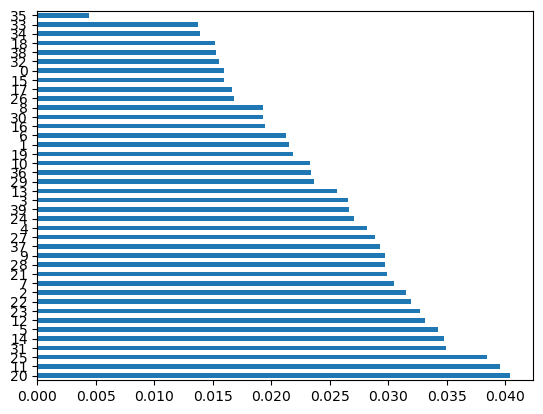

In [20]:
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(40).plot(kind='barh')
plt.show()

In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),threshold=0.01)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (85768, 40)
X_train_selected.shape: (85768, 39)


In [22]:
mask = select.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True])

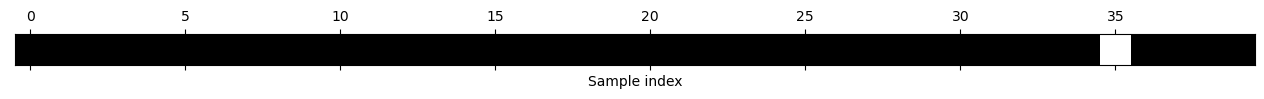

In [23]:
mask = select.get_support()

plt.matshow(mask.reshape(1,-1),cmap="gray_r")
plt.xlabel("Sample index")
plt.yticks(())
plt.show()

In [24]:
X_test_selected = select.transform(X_test)

model = RandomForestClassifier(n_estimators=100,random_state=42)

model.fit(X_train,y_train)
print("Score with all features: {:.3f}".format(model.score(X_test,y_test)))

model.fit(X_train_selected,y_train)
print("Score with selected features: {:.3f}".format(model.score(X_test_selected,y_test)))

Score with all features: 0.950
Score with selected features: 0.950


In [25]:
from xgboost import XGBClassifier
X_test_selected = select.transform(X_test)

model = XGBClassifier(n_estimators=100,random_state=42)
model.fit (X_train,y_train)
print("Score with all features: {:.3f}".format(model.score(X_test,y_test)))

model.fit (X_train_selected,y_train)
print("Score with selected features: {:.3f}".format(model.score(X_test_selected,y_test)))

KeyboardInterrupt: 